In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm, tnrange, tqdm_notebook
import seaborn as sns
import os

pd.set_option('display.max_rows', None)

# # Load the results
def load_scores_loop3(experiments, task_id_lists, base_save_folder, num_replicates):
    results = pd.DataFrame(columns = ['replicate','taskid','exp_name','seed','auroc', 'accuracy', 'balanced_accuracy', 'fairness', 'train_auroc', 'train_accuracy', 
                                                        'train_balanced_accuracy', 'train_fairness'])
    for taskid in task_id_lists:
        for rep in range(num_replicates):
            for exp in experiments:
                save_folder = f"{base_save_folder}/{taskid}_{rep}_{exp}"
                print(save_folder)
                if not os.path.exists(save_folder):
                    continue
                else:
                    # Load the results
                    results_file = f"{save_folder}/scores.pkl"

                    if os.path.exists(results_file):
                        r = pickle.load(open(results_file,'rb'))
                        r['replicate'] = [rep]*r.shape[0]
                        results = pd.concat([results,r], ignore_index=True)

    return results

task_ids = ['ricci', 'heart_disease', 'student_math', 'student_por', 'creditg', 'titanic', 'us_crime', 'compas_violent', 'nlsy', 'compas',
            'speeddating', 'meps19', 'meps21', 'meps20', 'law_school', 'default_credit', 'bank', 'adult']
experiments = ['No Weights',
               'Evolved Weights',
              'Calculated Weights']

results_folder = '/home/sainia3/genal/results5'
save_folder = 'figures/'

files_dir = [
    f for f in os.listdir(results_folder) if os.path.isdir(os.path.join(results_folder, f))
]
print(files_dir)

# Choosing task_ids 1:11 because 'ricci' is too easy to solve leading to an AUROC of 1
df0 = load_scores_loop3(experiments, task_ids[1:11], f'{results_folder}/{files_dir[0]}', 20)

["<class 'sklearn.ensemble._forest.RandomForestClassifier'>"]
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_0_No Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_0_Evolved Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_0_Calculated Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_1_No Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_1_Evolved Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_1_Calculated Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_2_No Weights
/home/sainia3/genal/results5/<class 'sklearn.ensemble._forest.RandomForestClassifier'>/heart_disease_2_Evolved Wei

In [2]:
# Just to see how the dataframe looks like
print(df0.head(10))

  replicate         taskid    exp_name  seed     auroc  accuracy  \
0         0  heart_disease  No Weights  1000  0.904762  0.852459   
1         0  heart_disease  No Weights  1001  0.910714  0.852459   
2         0  heart_disease  No Weights  1002  0.908009  0.852459   
3         0  heart_disease  No Weights  1003  0.918831  0.836066   
4         0  heart_disease  No Weights  1004  0.911255  0.852459   
5         0  heart_disease  No Weights  1005  0.919913  0.852459   
6         0  heart_disease  No Weights  1006  0.902056  0.836066   
7         0  heart_disease  No Weights  1007  0.919372  0.868852   
8         0  heart_disease  No Weights  1008  0.913961  0.852459   
9         0  heart_disease  No Weights  1009  0.888528  0.852459   

   balanced_accuracy  fairness  train_auroc  train_accuracy  \
0           0.847403  0.016185     0.918350        0.857143   
1           0.844697  0.013159     0.936027        0.836735   
2           0.847403  0.019990     0.923401        0.816327   

In [3]:
# PARETO FRONT TOOLS
def check_dominance(p1,p2):
    flag1 = 0
    flag2 = 0

    for o1,o2 in zip(p1,p2):
        if o1 < o2:
            flag1 = 1
        elif o1 > o2:
            flag2 = 1

    if flag1==1 and flag2 == 0:
        return 1
    elif flag1==0 and flag2 == 1:
        return -1
    else:
        return 0


def front(obj1,obj2):
    """return indices from x and y that are on the Pareto front."""
    rank = []
    assert(len(obj1)==len(obj2))
    n_inds = len(obj1)
    front = []

    for i in np.arange(n_inds):
        p = (obj1[i],obj2[i])
        dcount = 0
        dom = []
        for j in np.arange(n_inds):
            q = (obj1[j],obj2[j])
            compare = check_dominance(p,q)
            if compare == 1:
                dom.append(j)
            elif compare == -1:
                dcount = dcount +1

        if dcount == 0:
            front.append(i)

    f_obj2 = [obj2[f] for f in front]
    s2 = np.argsort(np.array(f_obj2))
    front = [front[s] for s in s2]

    return front

/home/sainia3/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/home/sainia3/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/home/sainia3/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  warnings.warn("Falling back to the python version of hypervolume "
/home/sainia3/anaconda3/envs/tpot2-myfork/lib/python3.10/site-packages/deap/tools/_hypervolume/pyhv.py:34: RuntimeWarning: Falling back to the python version of hy

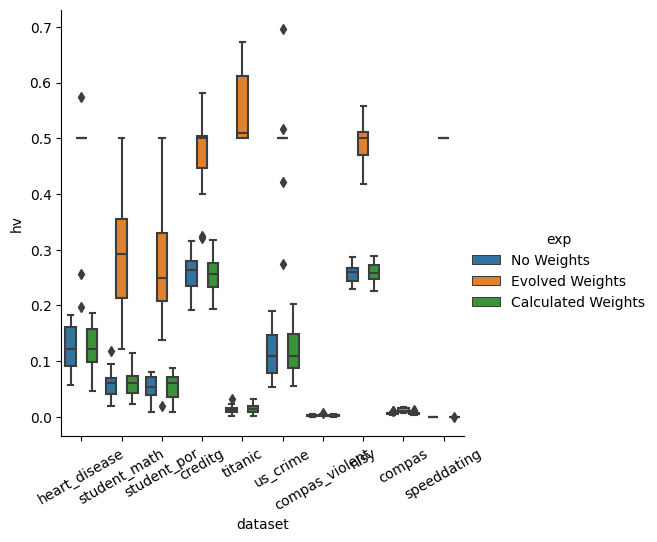

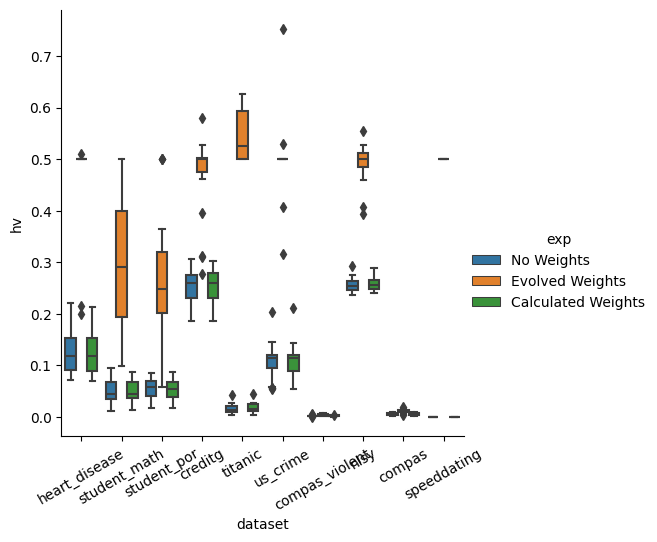

           hv         dataset                 exp  num_pts
0    0.117762   heart_disease          No Weights        8
1    0.104496   heart_disease          No Weights       14
2    0.072222   heart_disease          No Weights       11
3    0.220727   heart_disease          No Weights       10
4    0.164006   heart_disease          No Weights        7
5    0.091982   heart_disease          No Weights        8
6    0.102242   heart_disease          No Weights        9
7    0.118058   heart_disease          No Weights        8
8    0.079402   heart_disease          No Weights        5
9    0.132221   heart_disease          No Weights       12
10   0.087595   heart_disease          No Weights       15
11   0.080687   heart_disease          No Weights       10
12   0.116902   heart_disease          No Weights        5
13   0.173403   heart_disease          No Weights        4
14   0.072478   heart_disease          No Weights        9
15   0.148218   heart_disease          No Weights       

In [8]:
# Hypervolume of pareto front for different datasets
import numpy as np
import pandas as pd
from deap.tools._hypervolume import pyhv

# Need to optimize this code
def plot_results3(df, task_ids, runs):
    hv_df = pd.DataFrame(columns = ['hv', 'dataset', 'exp', 'num_pts']) # results on training data
    hv_test_df = pd.DataFrame(columns = ['hv', 'dataset', 'exp', 'num_pts']) # results on test data
    
    for taskid in task_ids:
        for exp in experiments:
    
            if not exp in df.values:
                continue
            
            if not taskid in df.values:
                continue
    
            x_vals = [] # auroc, etc
            y_vals = [] # fnr, etc.

            partial_df = df.loc[(df['exp_name'] == exp) & (df['taskid'] == taskid)]

            for r in range(runs):
                # Each run has 1000 individuals, and therefore will have one hv for validation set and one for test set
                # based on pareto-front derived from these 1000 individuals
                this_df = partial_df.loc[(df['run'] == r)]
                x_vals = this_df['train_auroc'].tolist()
                y_vals = this_df['train_fairness'].tolist()
 
                PF = front(x_vals,y_vals)
                pf_x = [x_vals[i] for i in PF]
                pf_y = [y_vals[i] for i in PF]
                if len(pf_x)==len(pf_y):
                    hv = pyhv.hypervolume([(xi,yi) for xi,yi in zip(pf_x,pf_y)], ref=np.array([1,1]))
                    hv_df.loc[len(hv_df.index)] = {'hv' : hv, 'dataset' : taskid, 'exp' : exp, 'num_pts':len(pf_x)}
                
                x_vals = this_df['auroc'].tolist()
                y_vals = this_df['fairness'].tolist()
 
                PF = front(x_vals,y_vals)
                pf_x = [x_vals[i] for i in PF]
                pf_y = [y_vals[i] for i in PF]
                if len(pf_x)==len(pf_y):
                    hv = pyhv.hypervolume([(xi,yi) for xi,yi in zip(pf_x,pf_y)], ref=np.array([1,1]))
                    hv_test_df.loc[len(hv_test_df.index)] = {'hv' : hv, 'dataset' : taskid, 'exp' : exp, 'num_pts':len(pf_x)}
            
    g=sns.catplot(data=hv_df, x="dataset", y="hv", hue="exp", kind="box")
    g.set_xticklabels(rotation=30)

    g=sns.catplot(data=hv_test_df, x="dataset", y="hv", hue="exp", kind="box")
    g.set_xticklabels(rotation=30)
    
    plt.show()

    print(hv_test_df)
    print(hv_df)


plot_results3(df0,task_ids[1:11],20)